# Weatherpy

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress
from config import weather_api_key
from citipy import citipy

results = "results/results.csv"

fahr = "imperial"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={fahr}&q="

## Building the List of Cities

In [3]:
coords = []
cities = []

lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lng = np.random.uniform(low=-180.000, high=180.000, size=1500)
coords = zip(lat, lng)

for coord in coords:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

593

In [4]:
city_list = []
country = []
clouds = []
dates = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

count = 1
for city in cities:  
    
    try: 
        response = requests.get(f"{url}{city}").json() 
        city_list.append(response["name"])
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        dates.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name = response["name"]
        print(f"Added Record {count} - {city_name}")
        count= count + 1
                
    except:
        print("Couldn't find a city, trying a new coordinate.")
    continue

Added Record 1 - Keïta
Added Record 2 - Airai
Added Record 3 - Cape Town
Added Record 4 - Olyka
Added Record 5 - Kawalu
Added Record 6 - Guerrero Negro
Added Record 7 - Bluff
Added Record 8 - Upington
Added Record 9 - Hamilton
Added Record 10 - Barrow
Added Record 11 - Tuktoyaktuk
Added Record 12 - Eskişehir
Added Record 13 - Mar del Plata
Added Record 14 - Kavaratti
Added Record 15 - Ol'ga
Added Record 16 - Mount Isa
Added Record 17 - East London
Added Record 18 - Butaritari
Added Record 19 - Kruisfontein
Added Record 20 - Cabo San Lucas
Added Record 21 - Hasaki
Added Record 22 - Atuona
Added Record 23 - New Norfolk
Added Record 24 - Qaanaaq
Added Record 25 - Saskylakh
Added Record 26 - Verāval
Added Record 27 - Punta Arenas
Added Record 28 - Dina
Added Record 29 - Vaini
Couldn't find a city, trying a new coordinate.
Added Record 30 - Itaituba
Added Record 31 - Talnakh
Added Record 32 - Thompson
Added Record 33 - Ushuaia
Added Record 34 - Sholokhovskiy
Added Record 35 - Narsaq
Couldn'

In [5]:
results_dict = {'City':city_list,
                'Cloudiness':clouds,
                'Country':country,
                'Date':dates,
                'Humidity':humidity,
                'Lat':lat,
                'Lng':lng,
                'Max Temp':max_temp,
                'Wind Speed':wind_speed}

results_df = pd.DataFrame(results_dict)

In [6]:
results_df.to_csv (results, index = None, header=True)
results_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Keïta,100,NE,1651937041,10,14.7551,5.7749,106.86,7.07
1,Airai,47,TL,1651937042,96,-8.9266,125.4092,60.53,3.94
2,Cape Town,0,ZA,1651936746,57,-33.9258,18.4232,63.12,23.02
3,Olyka,26,UA,1651937042,62,50.7186,25.8125,63.93,1.70
4,Kawalu,100,ID,1651936952,96,-7.3817,108.2082,74.03,1.92


# Scatter Plots

## Temperature (F) vs. Latitude

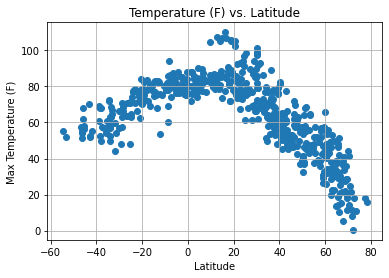

In [7]:
temp_lat_plt = plt.scatter(results_df['Lat'],results_df['Max Temp'],marker='o')
plt.grid()
plt.title('Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('results/Figure_1.png')
plt.show()

## Humidity (%) vs. Latitude

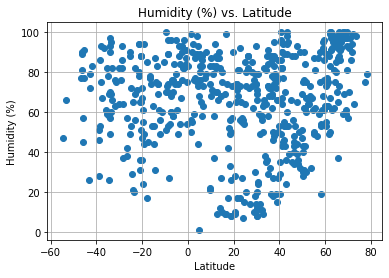

In [8]:
hum_lat_plt = plt.scatter(results_df['Lat'],results_df['Humidity'],marker='o')
plt.grid()
plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('results/Figure_2.png')
plt.show()

## Cloudiness (%) vs. Latitude

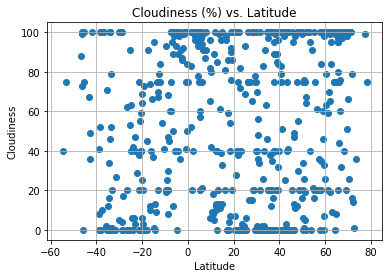

In [9]:
cld_lat_plt = plt.scatter(results_df['Lat'],results_df['Cloudiness'],marker='o')
plt.grid()
plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('results/Figure_3.png')
plt.show()

## Wind Speed (mph) vs. Latitude

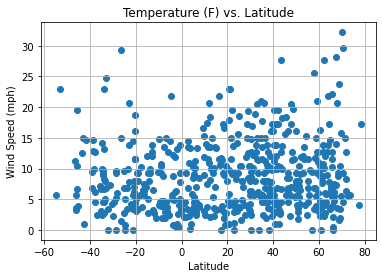

In [10]:
wind_lat_plt = plt.scatter(results_df['Lat'],results_df['Wind Speed'],marker='o')
plt.grid()
plt.title('Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('results/Figure_4.png')
plt.show()

# Linear Regressions

## Northern Hemisphere - Temperature (F) vs. Latitude

In [11]:
n_hemi_df = results_df[results_df['Lat'] >= 0]
s_hemi_df = results_df[results_df['Lat'] < 0]

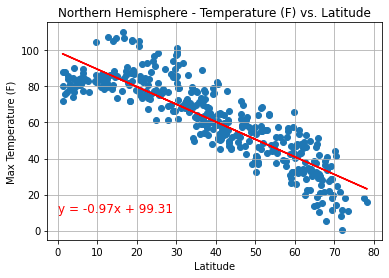

In [12]:
x = n_hemi_df['Lat']
y = n_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_temp_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(0,10),fontsize=12,color='red')
plt.grid()
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('results/Figure_5.png')
plt.show()

## Southern Hemisphere - Temperature (F) vs. Latitude

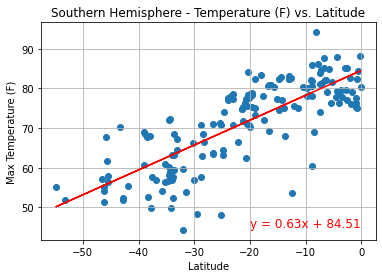

In [13]:
x = s_hemi_df['Lat']
y = s_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

s_temp_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(-20,45),fontsize=12,color='red')
plt.grid()
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('results/Figure_6.png')
plt.show()

* There is a clear correlation between latitude and max temperatures. The max temps reduce the farther away you measure from the equator. There is a slightly larger correlation in the northern hemisphere vs the southern, but I suspect this is due to many more data points (i.e. cities) on the northern hemisphere due to the distribution of landmasses on the planet.

## Northern Hemisphere - Humidity (%) vs. Latitude

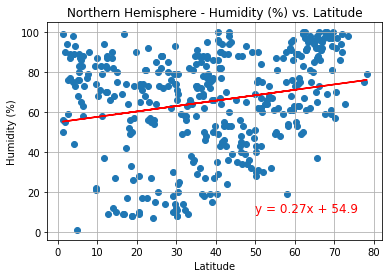

In [14]:
x = n_hemi_df['Lat']
y = n_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_hum_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(50,10),fontsize=12,color='red')
plt.grid()
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('results/Figure_7.png')
plt.show()

## Southern Hemisphere - Humidity (%) vs. Latitude

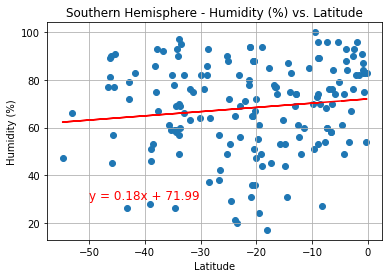

In [15]:
x = s_hemi_df['Lat']
y = s_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_hum_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,30),fontsize=12,color='red')
plt.grid()
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('results/Figure_8.png')
plt.show()

* There is not a strong correlation between latitude and humidity percentages. According to these data, the humitidy percentage can be expected to increase as you go north, but with no relation to the equator. this may be due to the same reasons as above, or another unknown factor such as global warming and pollution being heavier in the northern hemisphere.

## Northern Hemisphere - Cloudiness (%) vs. Latitude

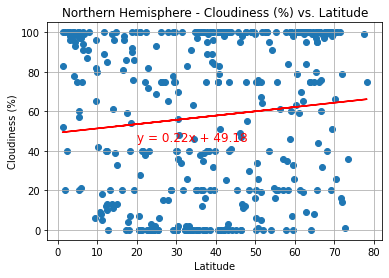

In [16]:
x = n_hemi_df['Lat']
y = n_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_hum_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(20,45),fontsize=12,color='red')
plt.grid()
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('results/Figure_9.png')
plt.show()

## Southern Hemisphere - Cloudiness (%) vs. Latitude

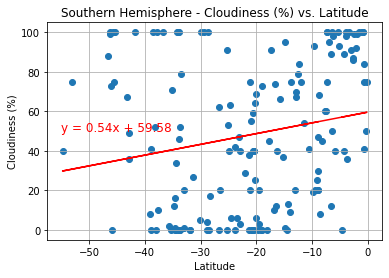

In [17]:
x = s_hemi_df['Lat']
y = s_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_hum_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(-55,50),fontsize=12,color='red')
plt.grid()
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('results/Figure_10.png')
plt.show()

* There is not astrong correlation between latitude and percentage of cloudiness. As above, these data show an increase in cloudiness as you travel north, with no relation to the equator. the same reasonings above are my best explanations for these results.

## Northern Hemisphere - Wind Speed (mph) vs. Latitude

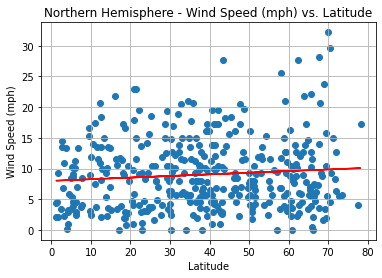

In [18]:
x = n_hemi_df['Lat']
y = n_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_hum_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(-55,50),fontsize=12,color='red')
plt.grid()
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('results/Figure_11.png')
plt.show()

## Southern Hemisphere - Wind Speed (mph) vs. Latitude

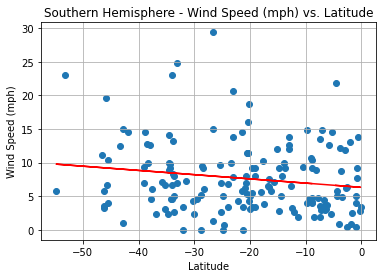

In [19]:
x = s_hemi_df['Lat']
y = s_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_hum_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(-55,50),fontsize=12,color='red')
plt.grid()
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('results/Figure_12.png')
plt.show()

* There is a slight correlation between latitude and wind speeds. The wind speeds increase as you travel away from the equator, but only in miniscule amounts. This may be due to the coriolis effect, or any number of other unknown factors. 